In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
import numpy as np

from tqdm import tqdm_notebook

import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('private_pt.csv')

In [4]:
df.head(5)

,Unnamed: 0,apex,domain_malicious,subdomain_malicious,#total_scans,#benign_scans,#query,#ip,#ns,ns_matching,...,mean_path_length_per_subdomain_paths,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year
0,0,missaomagalu.com,True,False,30.0,0.0,205.0,1.0,1.0,True,...,14.111111,0.0,73,1,1,0,0,0,1000000.0000,False
1,1,nadescomister.org,True,False,18.0,0.0,2.0,1.0,1.0,True,...,26.483334,0.0,81,1,2,0,0,0,1000000.0000,False
2,2,keeleycollc.org,True,False,17.0,0.0,915.0,2.0,1.0,True,...,10.687500,0.0,71,1,1,1,0,0,1000000.0000,False
3,3,wldptmfls.com,True,True,38.0,1.0,722.0,1.0,1.0,True,...,1.000000,0.0,53,1,1,0,0,0,1000000.0000,False
4,4,fddfgf55.xyz,True,False,262.0,0.0,236.0,3.0,1.0,True,...,23.295454,0.0,81,1,1,0,0,0,1653.8948,False


In [5]:
df.columns

Index(['Unnamed: 0', 'apex', 'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'label', 'positives', 'response_code',
       'rlength', 'url_after_redirects', 'url', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0                                              0
apex                                                    0
domain_malicious                                        0
subdomain_malicious                                     0
#total_scans                                            1
#benign_scans                                           1
#query                                                 10
#ip                                                    10
#ns                                                    10
ns_matching                                            10
#soa                                                   10
soa_matching                                           10
label                                                   0
positives                                               0
response_code                                           0
rlength                                                 0
url_after_redirects                                     0
url           

In [7]:
print('Attacker-Created Compromised Data set 1')
print('Size of the data set {}'.format(df.shape[0]))
print('Size of the Attacker-Created set {}'.format(df.loc[df.label==1].shape[0]))
print('Size of the Compromised set {}'.format(df.loc[df.label==0].shape[0]))

Attacker-Created Compromised Data set 1
Size of the data set 453
Size of the Attacker-Created set 280
Size of the Compromised set 173


In [8]:
df = df[['apex', 'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'label', 'positives', 'response_code',
       'rlength', 'url_after_redirects', 'url', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year']]

In [9]:
df.isnull().sum()

apex                                                    0
domain_malicious                                        0
subdomain_malicious                                     0
#total_scans                                            1
#benign_scans                                           1
#query                                                 10
#ip                                                    10
#ns                                                    10
ns_matching                                            10
#soa                                                   10
soa_matching                                           10
label                                                   0
positives                                               0
response_code                                           0
rlength                                                 0
url_after_redirects                                     0
url                                                     0
suspicious_tld

In [10]:
data = df

In [11]:
data['ns_matching'] = data['ns_matching'].replace(np.nan, None)
data['soa_matching'] = data['soa_matching'].replace(np.nan, None)
data = data.fillna(0)

In [12]:
data.isnull().sum()

apex                                                   0
domain_malicious                                       0
subdomain_malicious                                    0
#total_scans                                           0
#benign_scans                                          0
#query                                                 0
#ip                                                    0
#ns                                                    0
ns_matching                                            0
#soa                                                   0
soa_matching                                           0
label                                                  0
positives                                              0
response_code                                          0
rlength                                                0
url_after_redirects                                    0
url                                                    0
suspicious_tld                 

In [13]:
data.dtypes

apex                                                    object
domain_malicious                                          bool
subdomain_malicious                                       bool
#total_scans                                           float64
#benign_scans                                          float64
#query                                                 float64
#ip                                                    float64
#ns                                                    float64
ns_matching                                             object
#soa                                                   float64
soa_matching                                            object
label                                                    int64
positives                                                int64
response_code                                           object
rlength                                                 object
url_after_redirects                                    

In [14]:
data.head(1).label

0    1
Name: label, dtype: int64

In [15]:
data['ns_matching'].unique()

array(['True', 'None'], dtype=object)

In [16]:
data['soa_matching'].unique()

array(['None', 'True'], dtype=object)

In [17]:
df[['rlength']]

,rlength
0,"213 7295\nName: rlength, dtype: int64"
1,"274 7559\nName: rlength, dtype: int64"
2,"393 81582\nName: rlength, dtype: int64"
3,"177 2194\nName: rlength, dtype: int64"
4,"371 392147\nName: rlength, dtype: int64"
...,...
448,"415 3234\nName: rlength, dtype: int64"
449,"297 44525\nName: rlength, dtype: int64"
450,"17 0\nName: rlength, dtype: int64"
451,"404 4436\nName: rlength, dtype: int64"


In [18]:
# data2 =[]
# for index , row in tqdm_notebook(data.iterrows()):
#     data2.append(row.set_value('rlength',int(row.rlength.split('\n')[0])))
# data2 = pd.DataFrame(data2)

In [19]:
# data2[['rlength']]

In [20]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

data['suspicious_tld'] = label_encoder.fit_transform(data['suspicious_tld'])
data['response_code'] = label_encoder.fit_transform(data['response_code'])
data['ns_matching'] = label_encoder.fit_transform(data['ns_matching'])
data['soa_matching'] = label_encoder.fit_transform(data['soa_matching'])


data['response_code '] = label_encoder.fit_transform(data['response_code'])
data['url_after_redirects'] = label_encoder.fit_transform(data['url_after_redirects'])
data['is_idn'] = label_encoder.fit_transform(data['is_idn'])
data['Is_FQDN_In_Alexa_1Year'] = label_encoder.fit_transform(data['Is_FQDN_In_Alexa_1Year'])

data['domain_malicious'] = label_encoder.fit_transform(data['domain_malicious'])
data['subdomain_malicious'] = label_encoder.fit_transform(data['subdomain_malicious'])

In [21]:
# data['days count-pdns'] = data['days count-pdns']/( data['days count-pdns'].max()-data['days count-pdns'].min())
# data['number of days between firstseen and lastseen'] = data['number of days between firstseen and lastseen']/(data['number of days between firstseen and lastseen'].max()-data['number of days between firstseen and lastseen'].min())

In [22]:
data.head(5)

,apex,domain_malicious,subdomain_malicious,#total_scans,#benign_scans,#query,#ip,#ns,ns_matching,#soa,...,mean_number_of_popular_keywords_per_subdomain_paths,url_length,#query_parameters,#dots_in_path,#brands_in_path,#similar_keywords_in_path,#suspicious_keywords_in_path,Alexa_Rank_Avg,Is_FQDN_In_Alexa_1Year,response_code
0,missaomagalu.com,1,0,30.0,0.0,205.0,1.0,1.0,1,1.0,...,0.0,73,1,1,0,0,0,1000000.0000,0,128
1,nadescomister.org,1,0,18.0,0.0,2.0,1.0,1.0,1,1.0,...,0.0,81,1,2,0,0,0,1000000.0000,0,195
2,keeleycollc.org,1,0,17.0,0.0,915.0,2.0,1.0,1,1.0,...,0.0,71,1,1,1,0,0,1000000.0000,0,327
3,wldptmfls.com,1,1,38.0,1.0,722.0,1.0,1.0,1,1.0,...,0.0,53,1,1,0,0,0,1000000.0000,0,87
4,fddfgf55.xyz,1,0,262.0,0.0,236.0,3.0,1.0,1,1.0,...,0.0,81,1,1,0,0,0,1653.8948,0,303


In [23]:
data.head(1).label

0    1
Name: label, dtype: int64

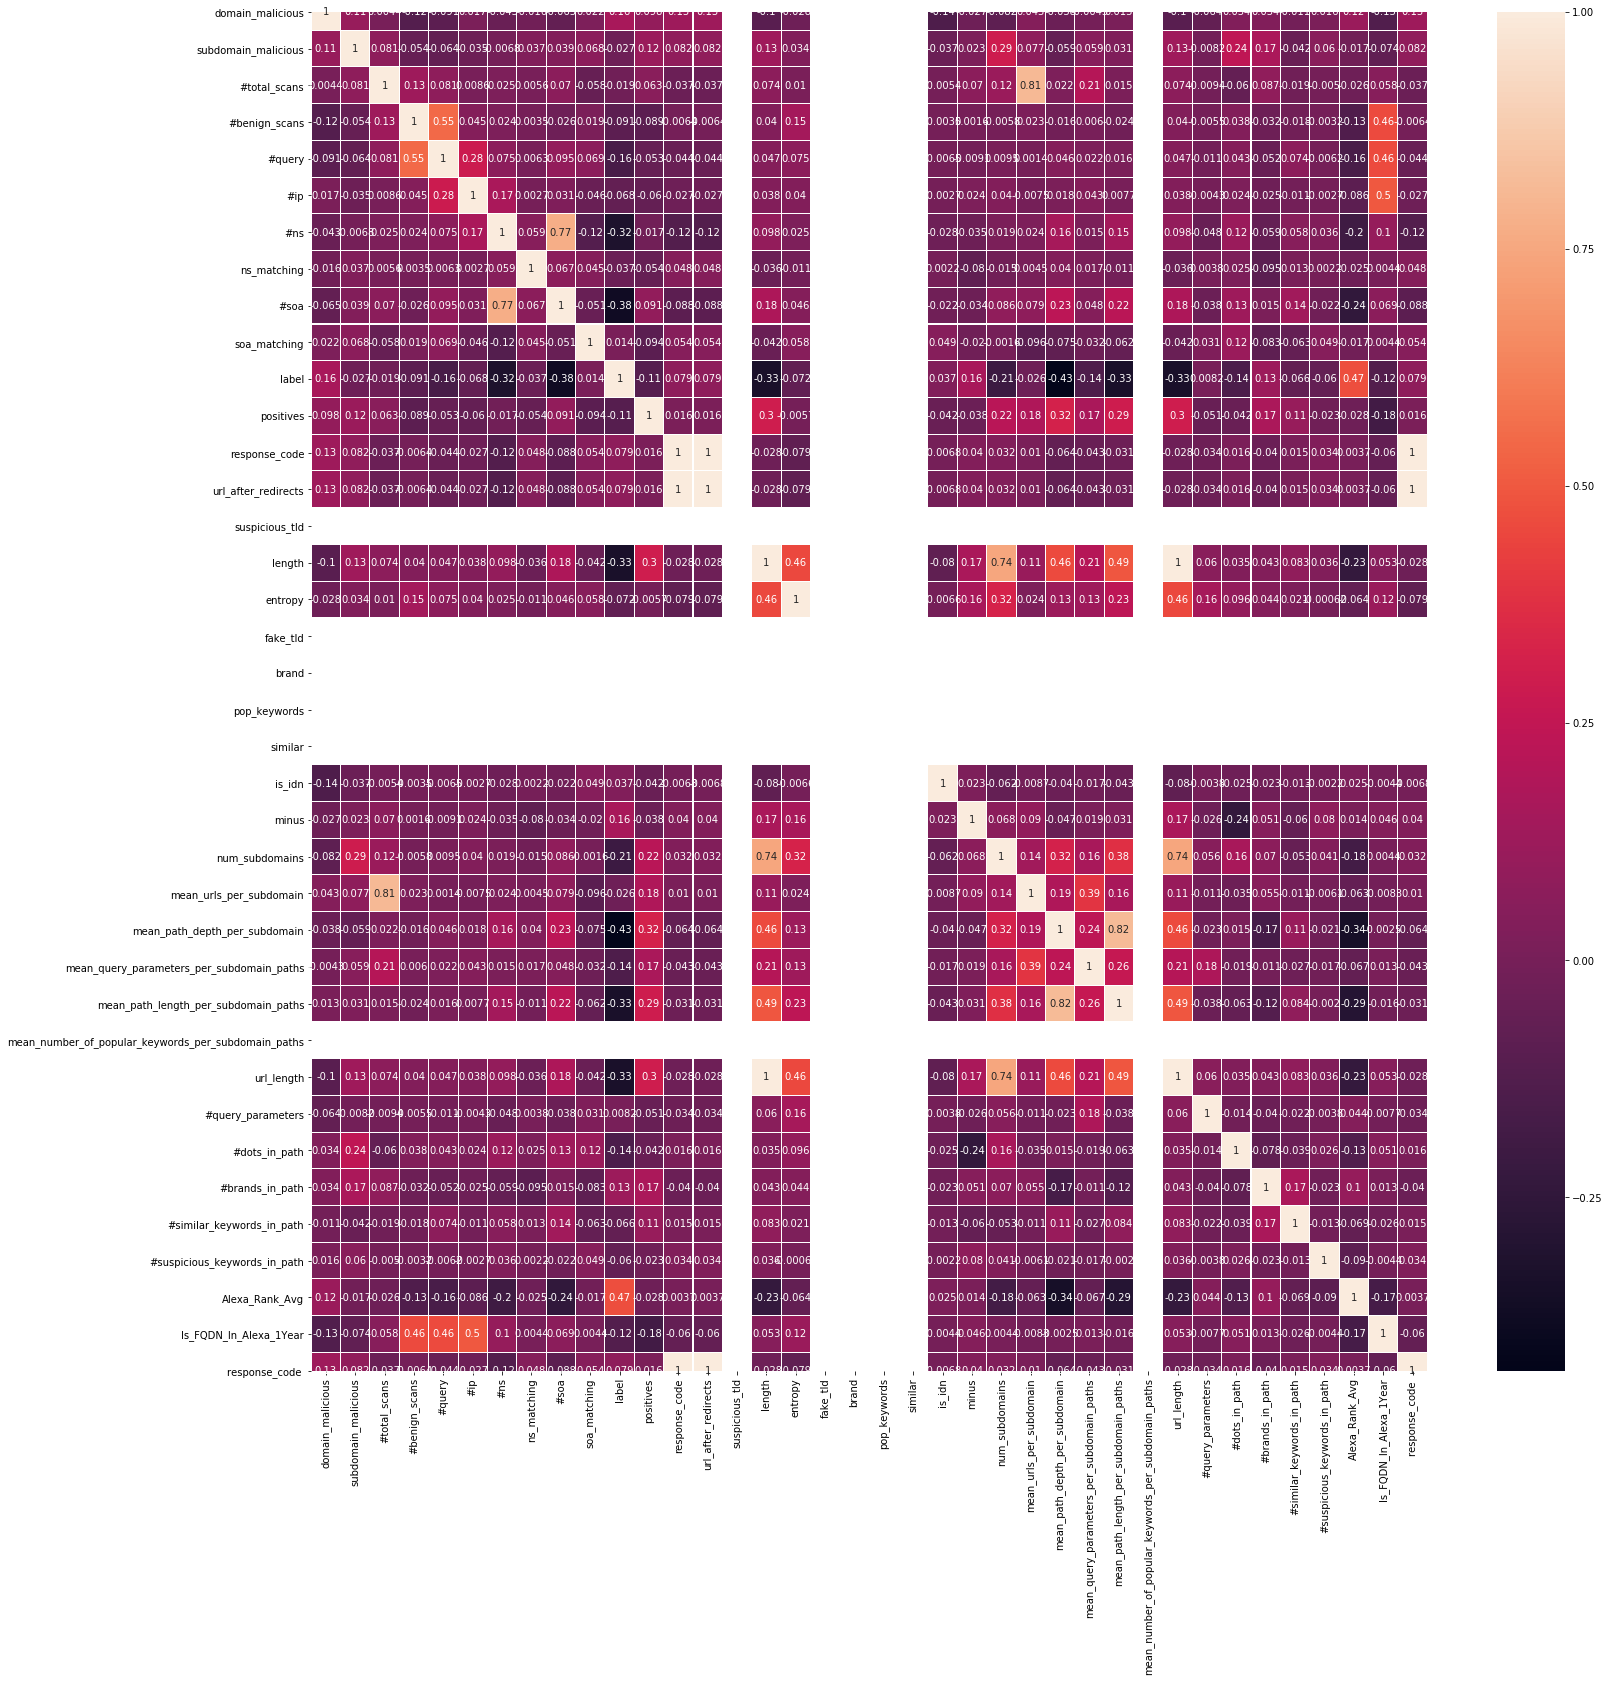

In [24]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr(), annot = True ,linewidths=.05)
# plt.savefig('attacker_created_compromised_corr_gt1.png')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data[[
       'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'positives', 'response_code',
        'url_after_redirects', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'
]
], data.label, test_size = 0.20, random_state = 0)

In [26]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Support Vector Classification :',SVC()],
       ['RandomForestClassifier : ',RandomForestClassifier()],      
      ]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(X_train,Y_train)
    predictions = model.predict(X_test)
    cla_pred.append(accuracy_score(Y_test,predictions))
    print(name,accuracy_score(Y_test,predictions),' precision : ',precision_score(Y_test,predictions),' recall : ',recall_score(Y_test,predictions))

Logistic Regression : 0.7582417582417582  precision :  0.7166666666666667  recall :  0.8958333333333334
Decision Tree Classification : 0.7912087912087912  precision :  0.7543859649122807  recall :  0.8958333333333334
Gradient Boosting Classification : 0.8461538461538461  precision :  0.8541666666666666  recall :  0.8541666666666666
Ada Boosting Classification : 0.8571428571428571  precision :  0.8723404255319149  recall :  0.8541666666666666
Extra Tree Classification : 0.8021978021978022  precision :  0.7777777777777778  recall :  0.875
K-Neighbors Classification : 0.8571428571428571  precision :  0.926829268292683  recall :  0.7916666666666666
Support Vector Classification : 0.7252747252747253  precision :  0.6666666666666666  recall :  0.9583333333333334
RandomForestClassifier :  0.8351648351648352  precision :  0.8367346938775511  recall :  0.8541666666666666


In [27]:
RFC = RandomForestClassifier()

In [28]:
from sklearn.model_selection import GridSearchCV

n_estimators = list(range(1,1001,100))
max_depth = list(range(1,1001,100))

hyperparameters = dict(max_depth=max_depth, n_estimators=n_estimators)
h_rfmodel = GridSearchCV(RFC, hyperparameters, cv=5,n_jobs=100, verbose=1)

best_logmodel=h_rfmodel.fit(X_train,Y_train)

n_estimators = best_logmodel.best_estimator_.get_params()['n_estimators']
max_depth = best_logmodel.best_estimator_.get_params()['max_depth']

print('Best Estimators:', n_estimators)
print('Best Max Depth:', max_depth)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=100)]: Using backend LokyBackend with 100 concurrent workers.
[Parallel(n_jobs=100)]: Done 250 tasks      | elapsed:   11.9s
[Parallel(n_jobs=100)]: Done 500 out of 500 | elapsed:   18.5s finished


Best Estimators: 701
Best Max Depth: 101


In [29]:
RFC = RandomForestClassifier(max_depth=max_depth, n_estimators=n_estimators)
RFC.fit(X_train,Y_train)
predictions_RFC = RFC.predict(X_test)

In [30]:
print('Random Forest',accuracy_score(Y_test,predictions_RFC),' precision : ',precision_score(Y_test,predictions_RFC),' recall : ',recall_score(Y_test,predictions_RFC),'\n')
print(classification_report(Y_test,predictions_RFC))

Random Forest 0.8351648351648352  precision :  0.851063829787234  recall :  0.8333333333333334 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        43
           1       0.85      0.83      0.84        48

    accuracy                           0.84        91
   macro avg       0.83      0.84      0.83        91
weighted avg       0.84      0.84      0.84        91



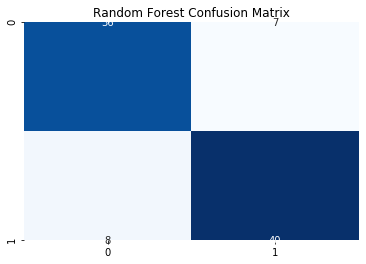

In [31]:
plt.title("Random Forest Confusion Matrix")
sns.heatmap(confusion_matrix(Y_test, predictions_RFC),annot=True,cmap="Blues",fmt="g",cbar=False)
# plt.savefig('attacker_created_compromised_classifier_confusion_matrix_gt1.png')
plt.show()

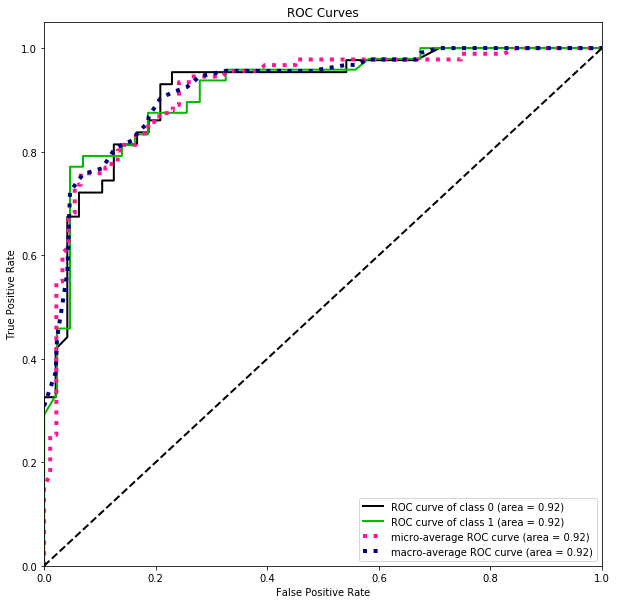

In [32]:
false_positive_rate_RFC, true_positive_rate_RFC, thresholds_RFC = roc_curve(Y_test,RFC.predict_proba(X_test)[:,1])
skplt.metrics.plot_roc_curve(Y_test.values,RFC.predict_proba(X_test), figsize = (10,10))
# plt.savefig('attacker_created_compromised_classifier_roc_gt1.png')
plt.show()

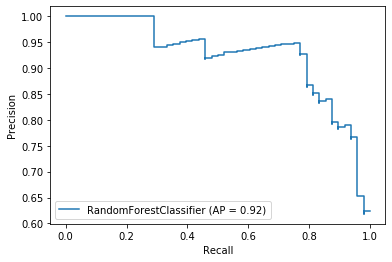

In [33]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

disp = plot_precision_recall_curve(RFC, X_test, Y_test)
# plt.savefig('attacker_created_compromised_classifier_precision_recall_curve_gt1.png')

Feature ranking:
1. feature 4 - #query (0.29445140873823406)
2. feature 5 - #ip (0.08350694590253407)
3. feature 24 - mean_path_depth_per_subdomain (0.07996386452858599)
4. feature 26 - mean_path_length_per_subdomain_paths (0.07638050502139647)
5. feature 34 - Alexa_Rank_Avg (0.06395152073698765)
6. feature 2 - #total_scans (0.04120814780734107)
7. feature 8 - #soa (0.040845222753503316)
8. feature 3 - #benign_scans (0.03251424521753346)
9. feature 23 - mean_urls_per_subdomain (0.030482826599737008)
10. feature 6 - #ns (0.0287019773207169)
11. feature 14 - length (0.026777536944172977)
12. feature 28 - url_length (0.026593890273831716)
13. feature 15 - entropy (0.026484905714847653)
14. feature 12 - url_after_redirects (0.023982882485548588)
15. feature 11 - response_code (0.023411158131550217)
16. feature 30 - #dots_in_path (0.023046301437705124)
17. feature 22 - num_subdomains (0.020170126437281985)
18. feature 10 - positives (0.015924097135996185)
19. feature 25 - mean_query_paramet

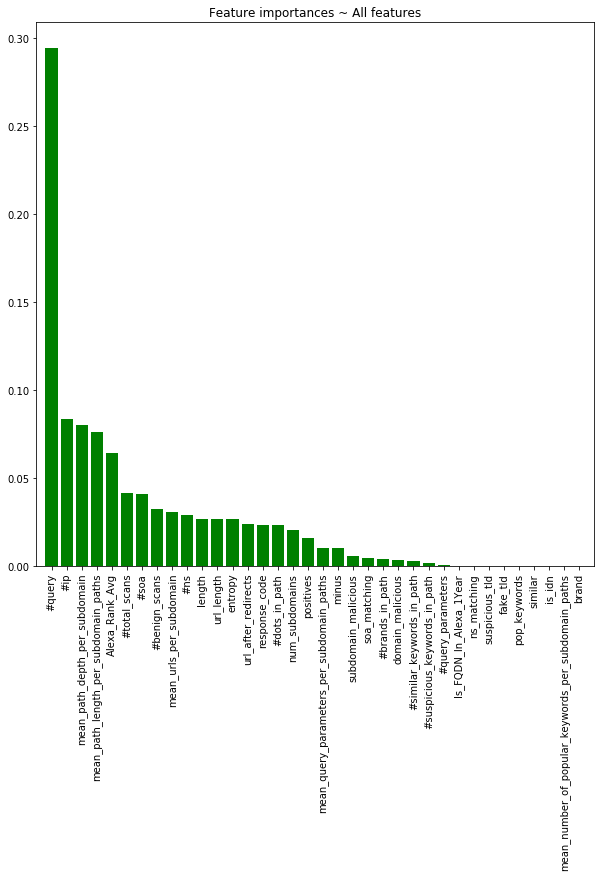

In [34]:
import numpy as np
importances = RFC.feature_importances_
std = np.std([RFC.feature_importances_ for tree in RFC.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
Feature = [
             'domain_malicious', 'subdomain_malicious',
       '#total_scans', '#benign_scans', '#query', '#ip', '#ns', 'ns_matching',
       '#soa', 'soa_matching', 'positives', 'response_code',
        'url_after_redirects', 'suspicious_tld', 'length',
       'entropy', 'fake_tld', 'brand', 'pop_keywords', 'similar', 'is_idn',
       'minus', 'num_subdomains', 'mean_urls_per_subdomain',
       'mean_path_depth_per_subdomain',
       'mean_query_parameters_per_subdomain_paths',
       'mean_path_length_per_subdomain_paths',
       'mean_number_of_popular_keywords_per_subdomain_paths', 'url_length',
       '#query_parameters', '#dots_in_path', '#brands_in_path',
       '#similar_keywords_in_path', '#suspicious_keywords_in_path',
       'Alexa_Rank_Avg', 'Is_FQDN_In_Alexa_1Year'
]
for f in range(X_train.shape[1]):
    print("{}. feature {} - {} ({})" .format(f + 1, indices[f], Feature[indices[f]], importances[indices[f]]))
indiceX = [Feature[i] for i in indices]
plt.figure(figsize=(10,10))
plt.title("Feature importances ~ All features")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="g", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indiceX, rotation=90)
plt.xlim([-1, X_train.shape[1]])
# plt.savefig('attacker_created_compromised_classifier_feature_importances_gt1.png')
plt.show()

In [35]:
import pickle
# pickle.dump(RFC,open('attacker_created_compromised_classifier_rf_gt_2_priv.pickle','wb'))